In [1]:
import pandas as pd
import numpy as np
import ml_02_pca
%reload_ext version_information
np.__version__, pd.__version__


('1.16.4', '0.24.2')

<h3>Einlesen des Boston-Housing Datensatzes</h3>

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, index_col=False)

In [3]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h3>1. Zentrieren der Daten</h3>

In [4]:
for col in cols:
    boston[col] = boston[col] - np.mean(boston[col])

In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-3.024370e-15,2.076161e-14,-2.800395e-14,-1.189760e-16,2.641716e-16,-8.141050e-15,-3.552714e-14,1.720187e-15,4.683123e-15,3.370163e-13,-2.348582e-14,7.632296e-13,-3.565001e-15,-2.570100e-14
std,8.601545e+00,2.332245e+01,6.860353e+00,2.539940e-01,1.158777e-01,7.026171e-01,2.814886e+01,2.105710e+00,8.707259e+00,1.685371e+02,2.164946e+00,9.129486e+01,7.141062e+00,9.197104e+00
min,-3.607204e+00,-1.136364e+01,-1.067678e+01,-6.916996e-02,-1.696951e-01,-2.723634e+00,-6.567490e+01,-2.665443e+00,-8.549407e+00,-2.212372e+02,-5.855534e+00,-3.563540e+02,-1.092306e+01,-1.753281e+01
25%,-3.531479e+00,-1.136364e+01,-5.946779e+00,-6.916996e-02,-1.056951e-01,-3.991344e-01,-2.354990e+01,-1.694868e+00,-5.549407e+00,-1.292372e+02,-1.055534e+00,1.870347e+01,-5.703063e+00,-5.507806e+00
50%,-3.357014e+00,-1.136364e+01,-1.446779e+00,-6.916996e-02,-1.669506e-02,-7.613439e-02,8.925099e+00,-5.875927e-01,-4.549407e+00,-7.823715e+01,5.944664e-01,3.476597e+01,-1.293063e+00,-1.332806e+00
75%,6.355894e-02,1.136364e+00,6.963221e+00,-6.916996e-02,6.930494e-02,3.388656e-01,2.550010e+01,1.393382e+00,1.445059e+01,2.577628e+02,1.744466e+00,3.955097e+01,4.301937e+00,2.467194e+00
max,8.536268e+01,8.863636e+01,1.660322e+01,9.308300e-01,3.163049e-01,2.495366e+00,3.142510e+01,8.331457e+00,1.445059e+01,3.027628e+02,3.544466e+00,4.022597e+01,2.531694e+01,2.746719e+01


<h3>2. Normieren der Daten auf eine Varianz von 1</h3>

In [6]:
for col in cols:
    boston[col] = boston[col] / np.std(boston[col])

In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-5.285627e-16,-2.354671e-15,5.092545e-16,2.544736e-15,-1.146031e-14,-1.122510e-15,9.834031e-16,1.553873e-15,-8.012914e-16,-1.020966e-14,8.075008e-15,-3.370163e-16,-2.967762e-15
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


<h3>3. Kopieren aller Daten xi als Reihen in eine n × d-Matrix X(Daten- oder Designmatrix).</h3>

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [9]:
n, d = np.shape(boston)
X = np.zeros((n, d))
for ni in range(n):
    for di in range(d):
        X[ni, di] = boston[cols[di]][ni]
#Alternativ: X = boston.to_numpy()

In [10]:
X

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

<h3>Berechnung der <I>Singulärwertzerlegung</I> von X mit <I>numpy.linalg.svd()</I></h3>

In [11]:
u,d,vt = np.linalg.svd(X, full_matrices=False)
v = vt.transpose()

In [12]:
v

array([[ 2.42284451e-01, -6.58731079e-02,  3.95077419e-01,
        -1.00366211e-01,  4.95765921e-03, -2.24627030e-01,
         7.77083366e-01, -1.57401402e-01,  2.54211798e-01,
        -7.13846149e-02, -7.10687807e-02,  6.32761157e-02,
         9.70323119e-02,  5.91141759e-02],
       [-2.45435005e-01, -1.48002653e-01,  3.94545713e-01,
        -3.42958421e-01,  1.14495002e-01, -3.35746944e-01,
        -2.74178365e-01,  3.80314042e-01,  3.82899480e-01,
         2.45579673e-01, -1.27709065e-01, -2.21122101e-01,
        -1.32375830e-01, -9.62968067e-02],
       [ 3.31859746e-01,  1.27075668e-01, -6.60819134e-02,
         9.62693566e-03, -2.25836917e-02, -8.08249519e-02,
        -3.40273839e-01, -1.71745781e-01,  6.27048264e-01,
        -2.54827026e-01,  2.73797614e-01,  3.48408284e-01,
         8.37168543e-02, -2.35472877e-01],
       [-5.02713285e-03,  4.10668763e-01, -1.25305293e-01,
        -7.00406497e-01, -5.35197817e-01,  1.62649056e-01,
         7.40757751e-02,  3.29270041e-02, -1.

<h3>5. Die ersten r Basisvektoren qi (d.h die ersten r Hauptkomponenten) sind die ersten r
Spalten der orthogonalen d × d-Matrix V .</h3>

In [13]:
r = 2
for ri in range(r):
    print(v[:,ri])

[ 0.24228445 -0.24543501  0.33185975 -0.00502713  0.32519388 -0.20281655
  0.29697657 -0.29816981  0.30341275  0.32403305  0.20767953 -0.19663836
  0.31139796 -0.2666364 ]
[-0.06587311 -0.14800265  0.12707567  0.41066876  0.25427636  0.43400581
  0.2603032  -0.35914998  0.0311496   0.00885141 -0.31462306  0.02648103
 -0.20124518  0.44492441]


6. Die Projektionen ai der Daten xi auf die ersten r Basisvektoren qj (d.h die neuen
Variablenwerte im neuen Koordinatensystem) sind die die ersten r Spalten der n × d Matrix UD.

7. Die Standardabweichungen entlang der Hauptkomponenten qi sind die Diagonalelemente der Diagonalmatrix D geteilt durch n − 1.

In [14]:
u * d
#Alternativ: u.dot(np.diag(d))

array([[-2.08734386e+00,  4.92853292e-01, -3.35990796e-01, ...,
        -1.09628939e-01, -4.94679790e-01,  2.47931084e-01],
       [-1.37338153e+00, -1.70923779e-01, -9.65964271e-01, ...,
         5.88700953e-01, -1.13056500e-01, -1.13116820e-01],
       [-2.37655336e+00,  9.14027176e-01, -9.00257783e-02, ...,
         4.16418193e-01,  3.57029666e-01,  5.13074653e-02],
       ...,
       [-3.68189649e-01,  8.23162397e-01, -9.33509355e-01, ...,
        -3.14763317e-01, -1.48478525e-01,  2.31503312e-03],
       [-2.64317340e-01,  5.40016199e-01, -1.03326735e+00, ...,
        -2.99460745e-01, -1.40693787e-01, -9.27786630e-03],
       [ 1.95235127e-01, -5.57976483e-01, -1.57608018e+00, ...,
        -4.28275137e-01, -5.09133897e-01, -1.35112101e-01]])

<h2>1a) Verwendung der pca als Modul</h2>

In [15]:
pc, ai, quadd, means = ml_02_pca.pca(boston, 14)

In [16]:
np.shape(pc)

(14, 14)

In [17]:
#ai

In [18]:
np.shape(ai)

(14, 506)

Stellen Sie Ihre Ergebnisse in einer Tabelle mit den Eigenwerten der Kovarianzmatrix
(Achtung: die Diagonalelemente von D müssen dafür quadriert und durch n − 1 geteilt
werden. Warum?)

Die Standardabweichungen entlang der Hauptkomponenten qi sind die Diagonalelemente der Diagonalmatrix D geteilt durch n − 1 (siehe 7.).
Das Quadrieren ist nötig, da die Varianz benötigt wird. Um diese zu erhalten muss die Standardabweichung quadriert werden.

Diese Schritte werden bereits im ml_02_pca Modul ausgeführt.

In [19]:
#Q = np.diag(quadd)

Kovarianzmatrix: Σ = QTΣ'Q

Q: Rotationsmatrix mit den auf Betrag 1 normierten Hauptkomponenten als Spalten

Σ': Diagonalmatrix mit den Varianzen der Projektionen(Scores) ai bezüglich der Hauptkomponenten

In [20]:
Q = np.zeros(np.shape(pc))
for i in range(np.shape(pc)[0]):
    betr = 0
    for j in range(len(pc[i])):
        betr = betr + pc[i][j]**2
    betr = np.sqrt(betr)
    Q[i] = pc[i] / betr
Q = Q.transpose()
sigmastrich = np.diag(quadd)
sigma = Q.transpose().dot(sigmastrich).dot(Q)

#TODO: Richtige Lösung einfügen

In [21]:
sigma

array([[ 9.19759513e-01,  8.04089050e-02,  3.94574508e-01,
        -3.10741812e-02,  6.87165768e-03, -3.16826835e-01,
         1.12349650e+00, -4.58942554e-01,  4.85096549e-01,
        -2.25118428e-01, -1.02444430e-01,  2.54547837e-01,
         3.14737412e-01,  4.69296197e-02],
       [ 8.04089050e-02,  5.43364855e-01, -2.72390505e-01,
        -2.63438740e-02, -1.22168788e-01,  1.96679682e-01,
        -2.94217603e-01,  1.02967913e-01, -1.10101781e-01,
        -2.04179261e-01,  4.07732101e-02, -3.39705370e-02,
        -8.62683135e-03, -3.13558811e-02],
       [ 3.94574508e-01, -2.72390505e-01,  1.52440638e+00,
        -3.54114507e-01,  9.55486267e-02, -7.46554702e-01,
         1.81273647e+00, -1.26254714e-01,  7.87881581e-01,
        -1.30790914e-01, -1.99235073e-01, -1.72865404e-02,
         1.50151773e-01,  1.01518239e-01],
       [-3.10741812e-02, -2.63438740e-02, -3.54114507e-01,
         8.16014910e-01,  1.98974715e-01,  2.55245802e-01,
        -3.74456163e-01, -2.49704705e-02, -3.

<h2>1c) Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den ursprünglichen Variablen. </h2>

In [22]:
np.corrcoef(ai[0], X[:,0])

array([[1.        , 0.61988795],
       [0.61988795, 1.        ]])

In [23]:
np.corrcoef(ai[1], X[:,1])

array([[ 1.        , -0.19008588],
       [-0.19008588,  1.        ]])

In [24]:
np.corrcoef(ai[2], X[:,2])

array([[ 1.        , -0.07674913],
       [-0.07674913,  1.        ]])

Interpretieren Sie Ihr Ergebnis.

Da die nichtdiagonalen Elemente ungleich 0 sind sind die Projektionen mit den ursprünglichen Variablen korreliert.

<h2>1d) Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar (am besten in
Pandas-Dataframe importieren). Plotten Sie dabei alle Datenpunkte mit einem Hauspreis
oberhalb des Medians aller Hauspreise in einer anderen Farbe als die Datenpunkte unterhalb.
Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?</h2>

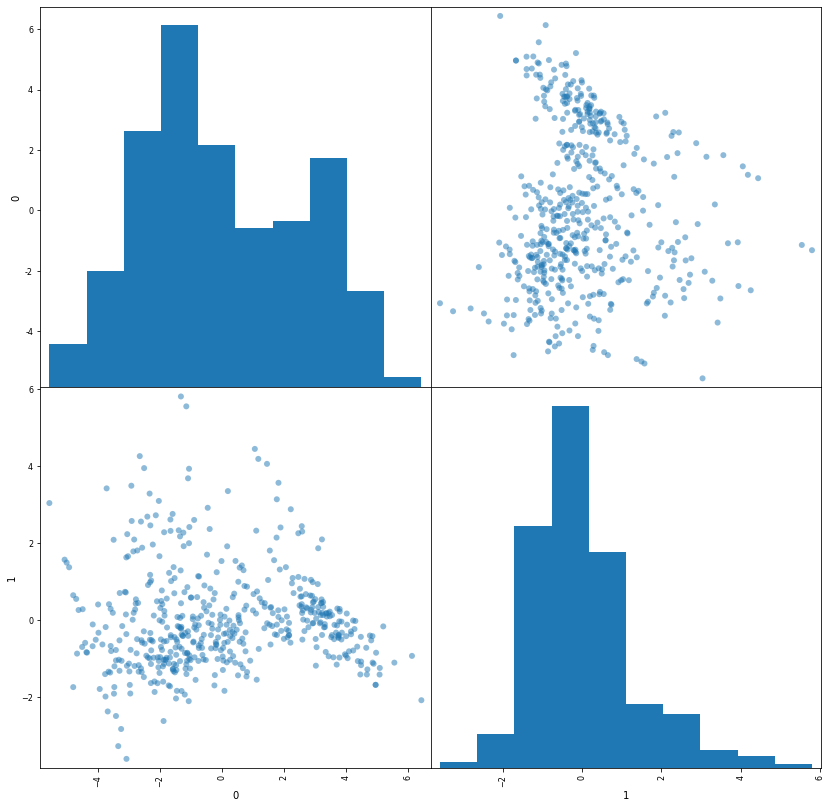

In [46]:
df = pd.DataFrame.from_records(ai[0:2]).transpose()
plot = pd.plotting.scatter_matrix(df, figsize=(14,14), marker='o');

In [59]:
ref = boston[boston['TGT'] >= boston['TGT'].describe()['50%']].index.values
ref

array([  0,   1,   2,   3,   4,   5,   6,   7,  12,  16,  38,  39,  40,
        41,  42,  43,  44,  52,  53,  55,  56,  57,  58,  62,  63,  64,
        65,  67,  70,  71,  72,  73,  74,  75,  78,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  95,  96,  97,
        98,  99, 100, 101, 110, 111, 116, 120, 125, 132, 150, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 212, 213, 214,
       215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,
       228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
       242, 243, 246, 248, 249, 250, 251, 252, 253, 254, 256, 257, 258,
       259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 28

In [ ]:
#TODO: Einfärben der Punkte mit den Indices aus ref

In [25]:
%version_information numpy, pandas

Software versions
Python 3.7.3 64bit [MSC v.1915 64 bit (AMD64)]
IPython 7.6.1
OS Windows 10 10.0.18362 SP0
numpy 1.16.4
pandas 0.24.2
Wed Nov 06 08:24:01 2019 Mitteleuropäische Zeit